In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../results/sampling_searching_kdn'
path_no = '../results/sampling_no_searching_kdn'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [4]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score global', 'best test score','performance gap'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'{path_no}/{exp}.json', 'r') as fin:
        exp_summary_no = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        
        if model == 'GradientBoostingClassifier':
            
            summary.loc[i, 'best test score'] = exp_summary_no[model]['test_score']
            summary.loc[i, 'threshold'] = exp_summary_no[model]['threshold']
            summary.loc[i, 'sample'] = exp_summary_no[model]['sample_proportion']
            
        else:
            
            best_arg = np.argmax(np.array([exp_summary_no[model]['best_score'], exp_summary[model]['best_score']]))
            summary.loc[i, 'best test score'] = [exp_summary_no[model]['test_score'], exp_summary[model]['test_score']][best_arg]
            summary.loc[i, 'threshold'] = [exp_summary_no[model]['threshold'], exp_summary[model]['threshold']][best_arg]
            summary.loc[i, 'sample'] = [exp_summary_no[model]['sample_proportion'], exp_summary[model]['sample_proportion']][best_arg]
        
        if abs(best_score[model]['cv_score'][0]-1) < 10e-4:
            summary.loc[i, 'best test score'] = best_score[model]['test_score']
            summary.loc[i, 'threshold'] = 1
            summary.loc[i, 'sample'] = 1
            
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['best test score']

In [5]:
summary

,dataset,model,sample,threshold,test score global,best test score,performance gap,complexity class difference
0,a9a,SVC,0.75,0.4,0.785729,0.79415,-0.008421,0.271056
1,a9a,KNeighborsClassifier,0.75,0.4,0.764211,0.76967,-0.005459,0.271056
2,a9a,RandomForestClassifier,0.56,0.2,0.765829,0.779607,-0.013779,0.271056
3,a9a,GradientBoostingClassifier,0.75,0.4,0.788514,0.798161,-0.009647,0.271056
4,appendicitis,SVC,0.92,0.8,0.5,0.83541,-0.33541,0.324320
...,...,...,...,...,...,...,...,...
143,w7a,GradientBoostingClassifier,0.11,0.4,0.871733,0.840214,0.031519,0.306783
144,w8a,SVC,0.12,0.8,0.907425,0.899939,0.007486,0.284726
145,w8a,KNeighborsClassifier,0.11,0.6,0.885566,0.80838,0.077186,0.284726
146,w8a,RandomForestClassifier,0.12,0.8,0.909964,0.876471,0.033493,0.284726


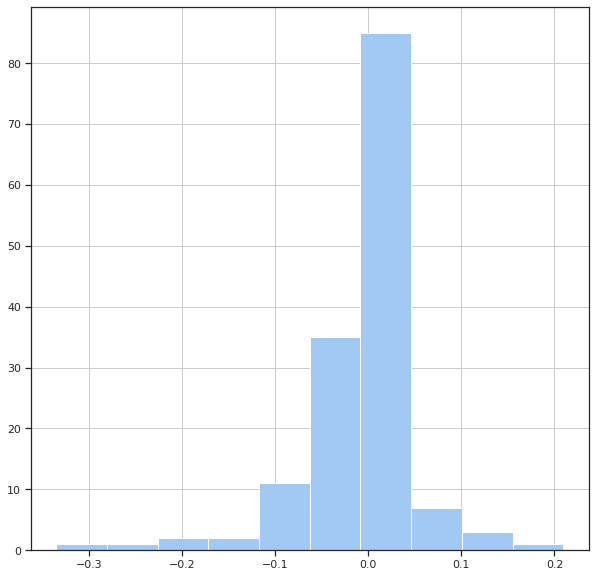

In [13]:
summary['performance gap'].hist(bins=10);

In [16]:
summary['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]).round(2)

count    148.00
mean      -0.01
std        0.06
min       -0.34
0%        -0.34
10%       -0.08
20%       -0.03
30%       -0.01
40%       -0.00
50%        0.00
60%        0.00
70%        0.01
80%        0.02
90%        0.04
max        0.21
Name: performance gap, dtype: float64

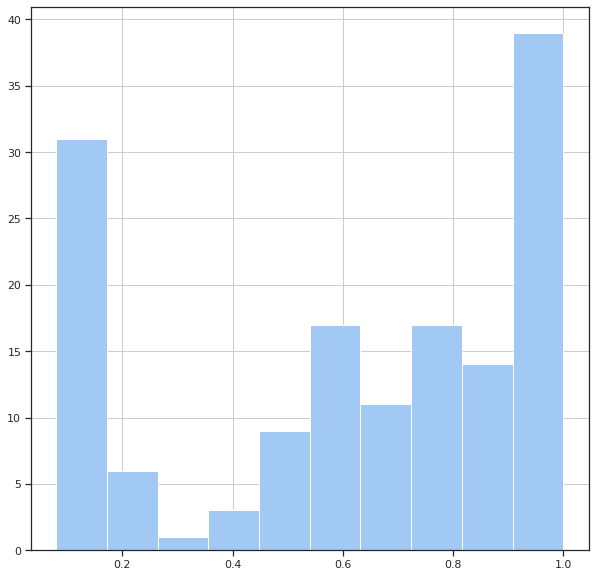

In [12]:
summary['sample'].hist(bins=10);

In [15]:
summary['sample'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)]).round(2)

count    148.00
mean       0.62
std        0.32
min        0.08
10%        0.13
20%        0.17
30%        0.48
40%        0.61
50%        0.65
60%        0.78
70%        0.86
80%        0.94
90%        0.99
max        1.00
Name: sample, dtype: float64

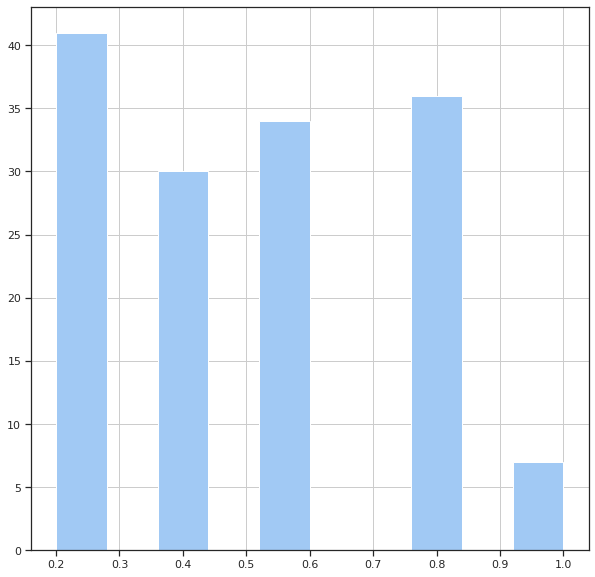

In [14]:
summary['threshold'].hist(bins=10);

In [17]:
summary['threshold'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)]).round(2)

count    148.00
mean       0.52
std        0.25
min        0.20
10%        0.20
20%        0.20
30%        0.40
40%        0.40
50%        0.60
60%        0.60
70%        0.60
80%        0.80
90%        0.80
max        1.00
Name: threshold, dtype: float64

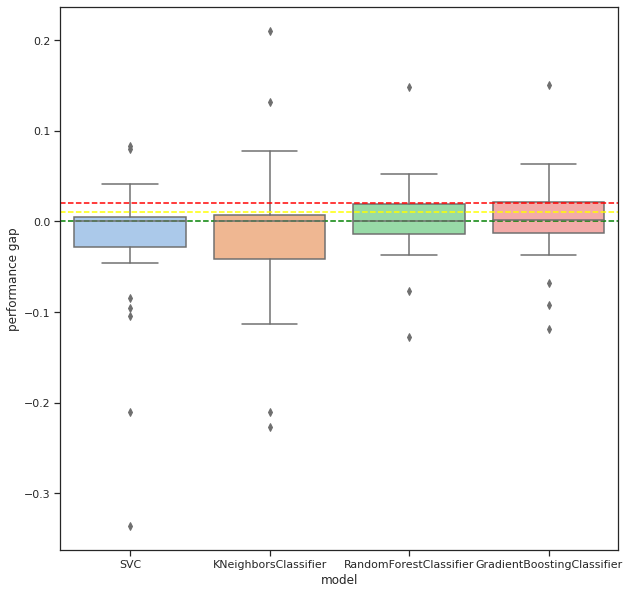

In [10]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='green')
plt.axhline(0.01, ls='--', c='yellow')
# plt.axhline(0.01, ls='--', c='orange')
plt.axhline(0.02, ls='--', c='red')
plt.show()

In [11]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]).round(2), '\n')

SVC
count    37.00
mean     -0.02
std       0.07
min      -0.34
0%       -0.34
10%      -0.09
20%      -0.04
30%      -0.02
40%      -0.00
50%       0.00
60%       0.00
70%       0.00
80%       0.01
90%       0.03
max       0.08
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.00
mean     -0.02
std       0.08
min      -0.23
0%       -0.23
10%      -0.11
20%      -0.05
30%      -0.04
40%      -0.01
50%       0.00
60%       0.00
70%       0.00
80%       0.01
90%       0.02
max       0.21
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.00
mean      0.00
std       0.04
min      -0.13
0%       -0.13
10%      -0.03
20%      -0.02
30%      -0.00
40%       0.00
50%       0.00
60%       0.00
70%       0.01
80%       0.02
90%       0.04
max       0.15
Name: performance gap, dtype: float64 

GradientBoostingClassifier
count    37.00
mean      0.00
std       0.04
min      -0.12
0%       -0.12
10%      -0.04
20%      -0.02
30%      -0.01
40%      -